In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random, datetime, os, shutil, math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


In [ ]:
# WARNING: this code is used to import dataset from kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#WARNING: this code is used while importing dataset from kaggle
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
#WARNING: this code is used while importing dataset from kaggle
#changing the working directory
!kaggle datasets download -d lantian773030/pokemonclassification

 98% 407M/417M [00:06<00:00, 45.8MB/s]
100% 417M/417M [00:06<00:00, 69.0MB/s]


In [ ]:
#WARNING: this code is used while importing dataset from kaggle
#unzipping the zip files and deleting the zip files
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: PokemonData/Golbat/78bb8cd2828f40158fc0dcd4c0366a57.jpg  
  inflating: PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: PokemonData/Golbat/acc2b44eada74a25a64c041b2e80c453.jpg  
  inflating: PokemonData/Golbat/af30483e382240d38890dec39e083b08.jpg  
  inflating: PokemonData/G

In [ ]:
#creating test dataset from the train dataset
dir_path='/content/gdrive/MyDrive/Kaggle/PokemonData'
classes = os.listdir(dir_path)

In [ ]:
#for creating a train folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train")

0

In [ ]:
#moving all folders from root folder to train folder
os.system("mv /content/gdrive/MyDrive/Kaggle/PokemonData/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/")

256

In [ ]:
# Creating the test folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test")


0

In [ ]:
#copying all train data to test folder, in order to get same folder structure
os.system("cp -r /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/")

0

In [ ]:
#deleting images from sub directories of test folder
os.system("find /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/ -name '*.*' -type f -delete")

0

In [ ]:
train_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train'
test_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test'

In [ ]:
# Copying 15 random images from train folders to test folders
def prep_test_data(pokemon, train_dir, test_dir):
  pop = os.listdir(train_dir+'/'+pokemon)
  test_data=random.sample(pop, 15)
  print(test_data)
  for f in test_data:
    shutil.copy(train_dir+'/'+pokemon+'/'+f, test_dir+'/'+pokemon+'/')

In [ ]:
#performing samething for each folder in train folder
for poke in os.listdir(train_dir):
  prep_test_data(poke, train_dir, test_dir)

['28cfad92ad934d1f9b579cbff4b5d012.jpg', '4e554e4a0f624656a7b1542b679b6157.jpg', '5c0ca320656b4f2fadea7aefeb80da53.jpg', '6119be89c1d24539a0310f40b947afc1.jpg', 'bdd70647363b47d0a97a6a9a1a7dd469.jpg', '586c195c0bcd48158db71c1d7f75197c.jpg', 'e106e14eb8b54eff8bea6f765ea9d20c.jpg', '86c823fe351549c7818efd6ca718556e.jpg', '7a300d6f799c48d1943cafaa5ab24e27.jpg', 'b0b6de31451f4e7aa3411fe0963a7f4f.jpg', '9754fcfa5d39464785f953e7c9da73d1.jpg', '34532bb006714727ade4075f0a72b92d.jpg', '7b9859252d9346f6b3e7bc46d423c116.jpg', 'c241146097b44c2e98ee7e473f90074a.jpg', 'b065da5f186d4f9db497012350b31a9f.jpg']
['263b3cb088e5448e99335fbda8f73ee7.jpg', '25d15a304c354f3e8064249cf704370d.jpg', '25adea61e7624a84a8fbe88d7dcbeb6e.jpg', 'f6de83f1ed034679bf49b84e0af203ce.jpg', 'e8d4cf4ee37a471bb92ee42e298eb692.jpg', '7fb69a33c0ca4c458812233bb4084b01.jpg', '0eab1e1f744340fa87268f2b558c7ccf.jpg', '4c7989f0dc414bb189a4990659dc0e3f.jpg', 'dbbd1c859b8d48878421e058f2d7e26c.jpg', '029d0c659dc448f49993648b024e615c.jpg'

In [ ]:
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 150
[(0, 'Abra'), (1, 'Aerodactyl'), (2, 'Alakazam'), (3, 'Alolan Sandslash'), (4, 'Arbok'), (5, 'Arcanine'), (6, 'Articuno'), (7, 'Beedrill'), (8, 'Bellsprout'), (9, 'Blastoise'), (10, 'Bulbasaur'), (11, 'Butterfree'), (12, 'Caterpie'), (13, 'Chansey'), (14, 'Charizard'), (15, 'Charmander'), (16, 'Charmeleon'), (17, 'Clefable'), (18, 'Clefairy'), (19, 'Cloyster'), (20, 'Cubone'), (21, 'Dewgong'), (22, 'Diglett'), (23, 'Ditto'), (24, 'Dodrio'), (25, 'Doduo'), (26, 'Dragonair'), (27, 'Dragonite'), (28, 'Dratini'), (29, 'Drowzee'), (30, 'Dugtrio'), (31, 'Eevee'), (32, 'Ekans'), (33, 'Electabuzz'), (34, 'Electrode'), (35, 'Exeggcute'), (36, 'Exeggutor'), (37, 'Farfetchd'), (38, 'Fearow'), (39, 'Flareon'), (40, 'Gastly'), (41, 'Gengar'), (42, 'Geodude'), (43, 'Gloom'), (44, 'Golbat'), (45, 'Goldeen'), (46, 'Golduck'), (47, 'Golem'), (48, 'Graveler'), (49, 'Grimer'), (50, 'Growlithe'), (51, 'Gyarados'), (52, 'Haunter'), (53, 'Hitmonchan'), (54, 'Hitmonlee'), (55, '

In [ ]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]

In [ ]:
def show_pokemon(pokemon):
  num = len(pokemon)
  if num == 0:
    return None
  rows = int(math.sqrt(num))
  cols = (num+1)//rows
  f, axs = plt.subplots(rows, cols)
  fig = 0
  for b in pokemon:
    img = image.load_img(b)
    row = fig // cols
    col = fig % cols
    axs[row, col].imshow(img)
    fig += 1
  plt.show()

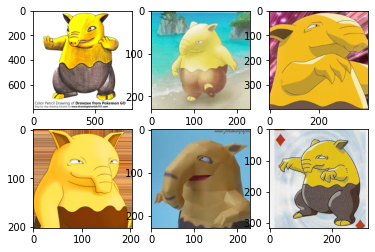

In [ ]:
dir_name = os.path.join(train_dir,"Drowzee")
all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
show_pokemon(all_images[:6])

In [ ]:
image_size = (64, 64, 3)
datagen=ImageDataGenerator(rescale = 1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           )

In [ ]:
training_set=datagen.flow_from_directory(train_dir,
                                         target_size=image_size[:2],
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='rgb'
                                         )

Found 6820 images belonging to 150 classes.


In [ ]:
validation_set=datagen.flow_from_directory(test_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='rgb'
                                           )

Found 2245 images belonging to 150 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras import applications
from keras.utils import plot_model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               4915350   
Total params: 4,994,070
Trainable params: 4,994,070
Non-trainable params: 0
____________________________________________

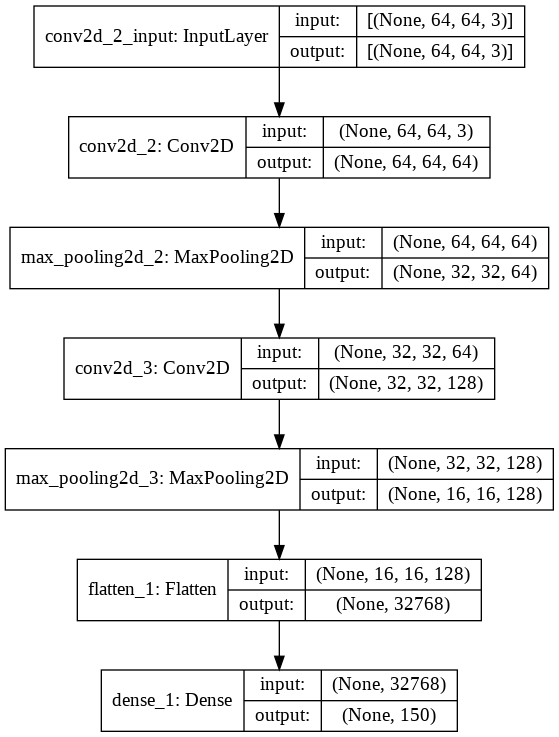

In [ ]:
#defining model
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()
plot_model(neuralnetwork_cnn, show_shapes=True) # just learned this nice new thing

In [ ]:
history = neuralnetwork_cnn.fit_generator(
    generator=training_set, validation_data=validation_set,
    callbacks=[es, ckpt, rlp], epochs = 20,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
214/214 [==============================] - 148s 692ms/step - loss: 1.2662 - acc: 0.6692 - val_loss: 1.0469 - val_acc: 0.7229

Epoch 00001: loss improved from 1.57183 to 1.26617, saving model to model.h5
Epoch 2/20
214/214 [==============================] - 149s 693ms/step - loss: 1.1003 - acc: 0.7122 - val_loss: 0.9063 - val_acc: 0.7617

Epoch 00002: loss improved from 1.26617 to 1.10031, saving model to model.h5
Epoch 3/20
214/214 [==============================] - 148s 693ms/step - loss: 0.8987 - acc: 0.7579 - val_loss: 0.6757 - val_acc: 0.8298

Epoch 00003: loss improved from 1.10031 to 0.89869, saving model to model.h5
Epoch 4/20
214/214 [==============================] - 148s 692ms/step - loss: 0.7497 - acc: 0.7999 - val_loss: 0.5872 - val_acc: 0.8445

Epoch 00004: loss improved from 0.89869 to 0.74972, saving model to model.h5
Epoch 5/20
214/214 [==============================] - 148s 692ms/step - loss: 0.6509 - acc: 0.8192 - val_loss: 0.5320 - val_acc: 0.8566

Epoch 0

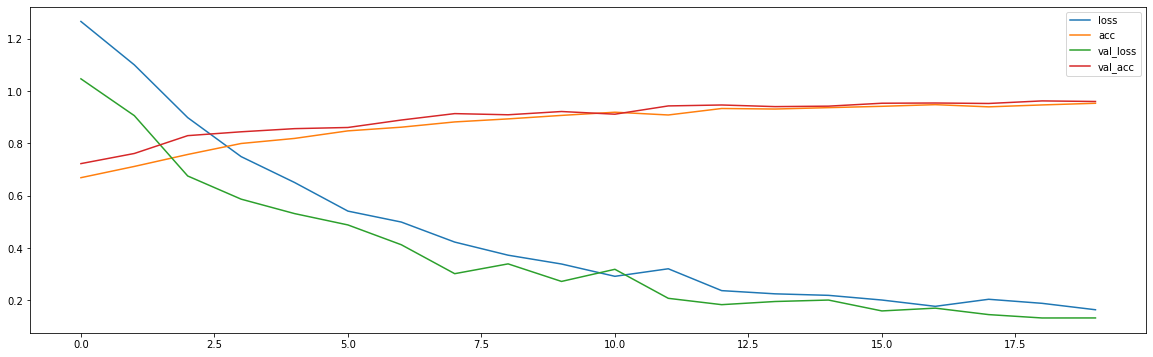

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)